In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('mydataset.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
print(df.head())

         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain  \
0       450              161             940            1        AWD   
1       270              167             250            0        RWD   
2       400              181             620            1        AWD   
3       360              206             560            1        RWD   
4       170              168             190            1        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchba

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 11.4+ KB
None


In [5]:
print(df.describe())

         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.000000    103.000000  103.000000       103.000000      103.000000   
mean     7.396117    179.194175  338.786408       189.165049      444.271845   
std      3.017430     43.573030  126.014444        29.566839      203.949253   
min      2.100000    123.000000   95.000000       104.000000      170.000000   
25%      5.100000    150.000000  250.000000       168.000000      260.000000   
50%      7.300000    160.000000  340.000000       180.000000      440.000000   
75%      9.000000    200.000000  400.000000       203.000000      555.000000   
max     22.400000    410.000000  970.000000       273.000000      940.000000   

       RapidCharge       Seats      PriceEuro  
count   103.000000  103.000000     103.000000  
mean      0.747573    4.883495   55811.563107  
std       0.436529    0.795834   34134.665280  
min       0.000000    2.000000   20129.000000  
25%       0.500000    5.000000   34429.

In [6]:
print(df.isnull().sum())

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
import plotly.express as px
import plotly.io as pio

# Count the frequency of each brand
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Frequency']

# Create a bar chart
fig = px.bar(brand_counts, x='Brand', y='Frequency', 
             title='Frequency of Car Brands in the Dataset',
             labels={'Brand': 'Car Brand', 'Frequency': 'Number of Cars'},
             color='Brand',
             text='Frequency')

# Show the plot
pio.show(fig)

In [9]:
fig = px.bar(df, x='Brand', y='TopSpeed_KmH', color='Brand',
             title='Which Car Brand Has the Most Speed?',
             labels={'x': 'Car Brands', 'y': 'TopSpeed_KmH'})
pio.show(fig)

In [10]:
fig = px.bar(df, x='Brand', y='AccelSec', color='Brand',
             title='Which Car Has the Fastest Acceleration?',
             labels={'x': 'Brands', 'y': 'Acceleration (Sec)'})
pio.show(fig)

In [11]:
# Create the bar plot for Brand vs Price
fig = px.bar(df, x='Brand', y='PriceEuro', color='Brand',
             title='Price of Cars by Brand',
             labels={'x': 'Car Brands', 'y': 'Price (Euro)'})

# Show the plot
pio.show(fig)

In [12]:
fig = px.pie(df, names='Brand', values='PriceEuro', 
             title='Distribution of Price by Car Brand')
pio.show(fig)

In [13]:
fig = px.bar(df, x='Range_Km', y='PowerTrain', color='PowerTrain', text='PowerTrain',
             title='Range of Different PowerTrains',
             labels={'x': 'Range (Km)', 'y': 'PowerTrain'})
pio.show(fig)

In [14]:
fig = px.box(df, x='RapidCharge', y='PriceEuro', color='RapidCharge',points='all')
pio.show(fig)

In [15]:
fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','PriceEuro'])
pio.show(fig)

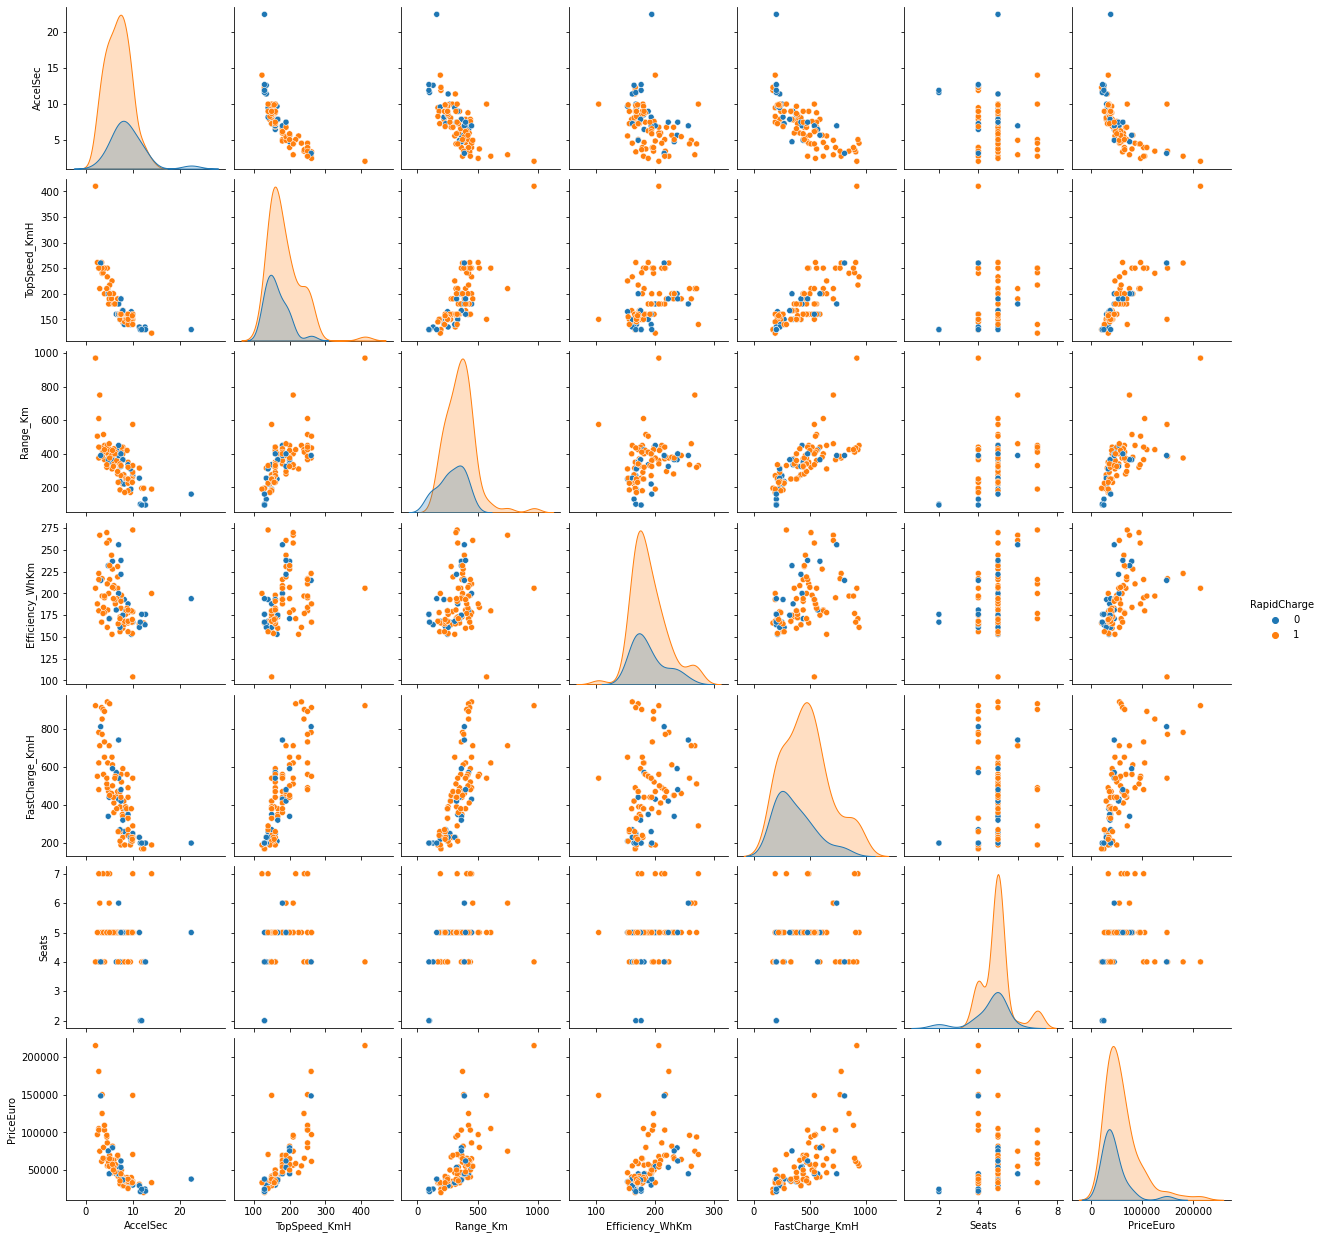

In [16]:
import seaborn as sn
sn.pairplot(df,hue='RapidCharge')

<AxesSubplot:>

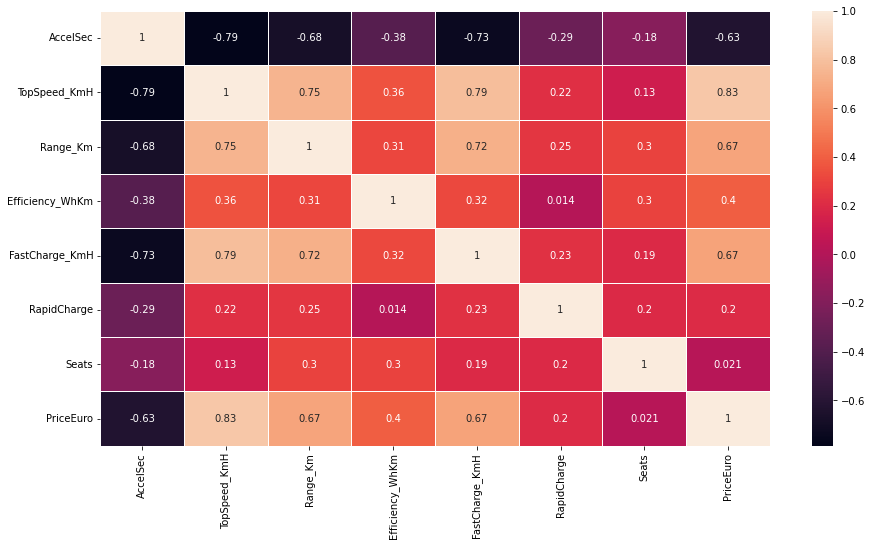

In [17]:
ax= plt.figure(figsize=(15,8))
sn.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

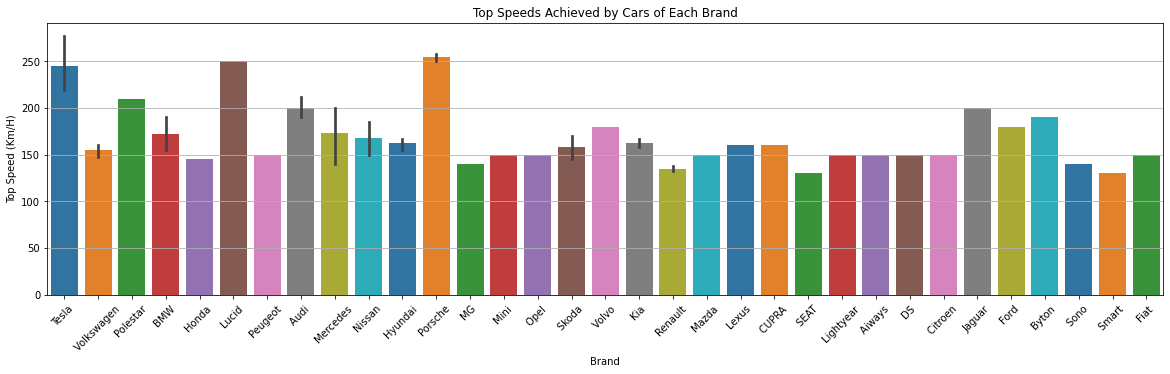

In [18]:
plt.figure(figsize=(20, 5))
sn.barplot(x='Brand', y='TopSpeed_KmH', data=df, palette='tab10')
plt.title('Top Speeds Achieved by Cars of Each Brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed (Km/H)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

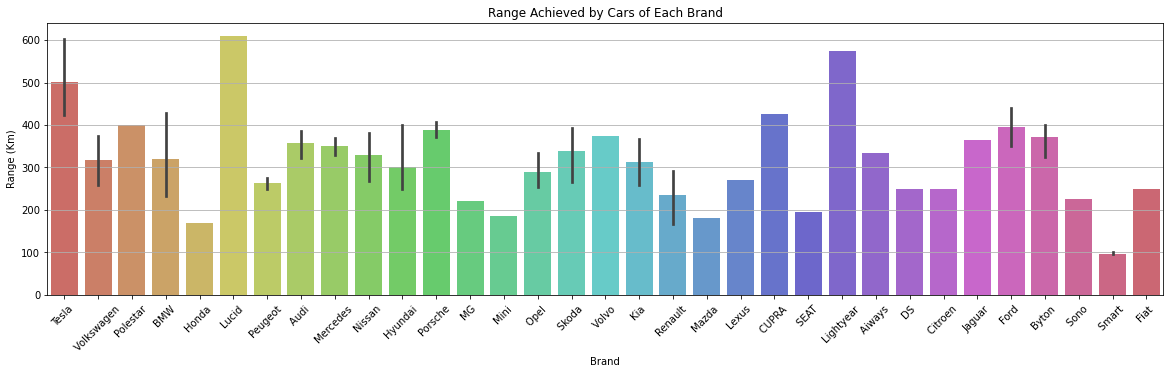

In [19]:
plt.figure(figsize=(20, 5))
sn.barplot(x='Brand', y='Range_Km', data=df, palette='hls')
plt.title('Range Achieved by Cars of Each Brand')
plt.xlabel('Brand')
plt.ylabel('Range (Km)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

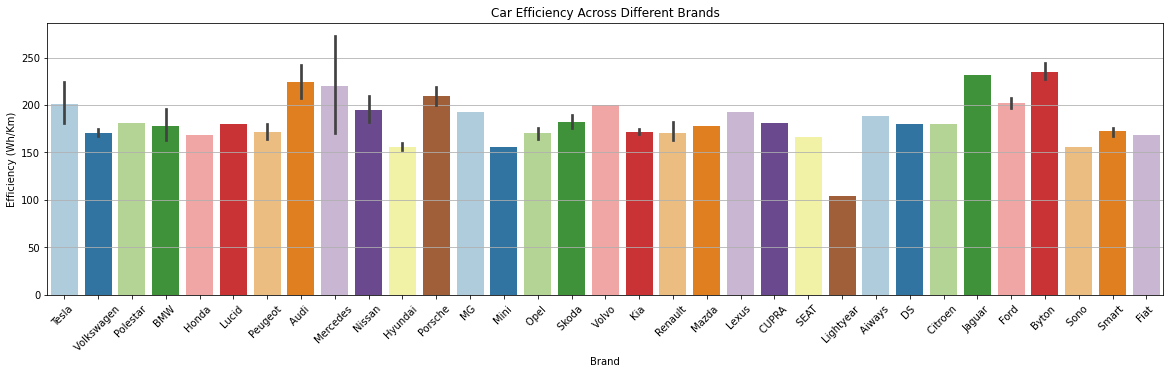

In [20]:
plt.figure(figsize=(20, 5))
sn.barplot(x='Brand', y='Efficiency_WhKm', data=df, palette='Paired')
plt.title('Car Efficiency Across Different Brands')
plt.xlabel('Brand')
plt.ylabel('Efficiency (Wh/Km)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

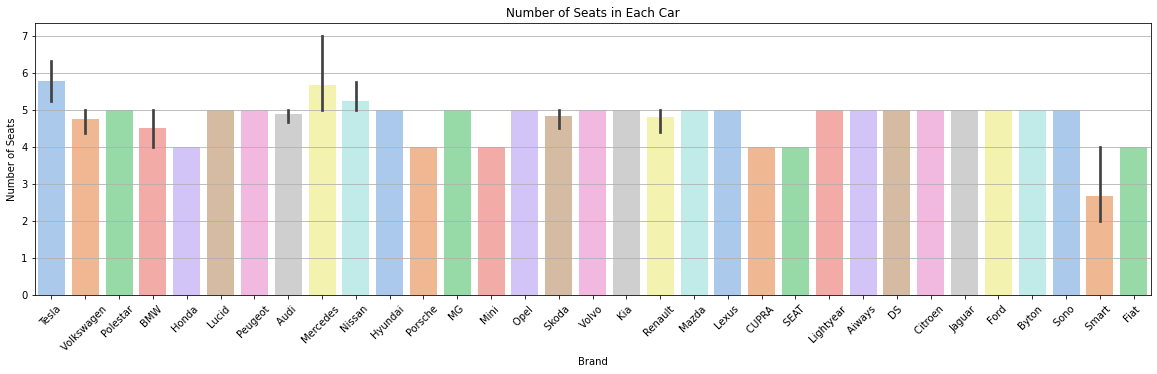

In [21]:
plt.figure(figsize=(20, 5))
sn.barplot(x='Brand', y='Seats', data=df, palette='pastel')
plt.title('Number of Seats in Each Car')
plt.xlabel('Brand')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

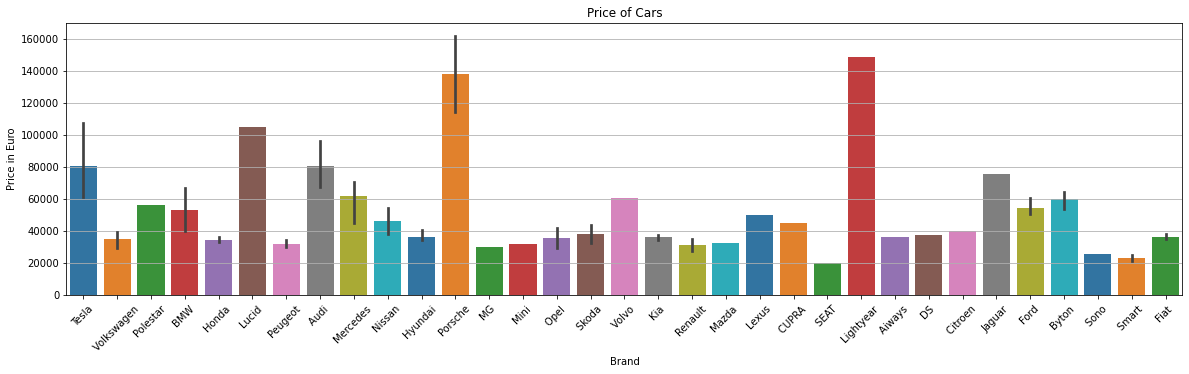

In [22]:
plt.figure(figsize=(20, 5))
sn.barplot(x='Brand', y='PriceEuro', data=df, palette='tab10')
plt.title('Price of Cars')
plt.xlabel('Brand')
plt.ylabel('Price in Euro')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

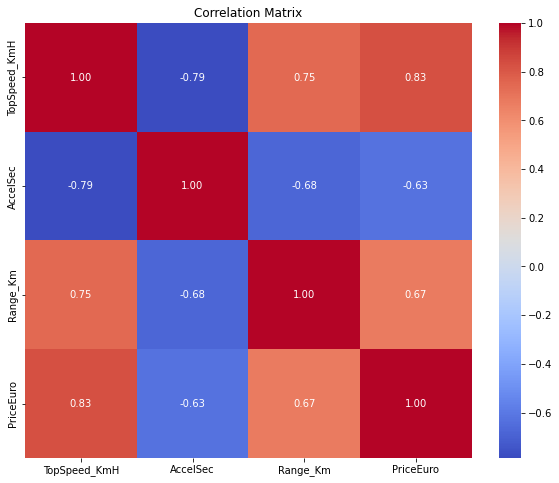

In [23]:
correlation_matrix = df[['TopSpeed_KmH', 'AccelSec', 'Range_Km', 'PriceEuro']].corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [24]:
fig = px.pie(df, names='PlugType', title='Distribution of Plug Types for Charging')
fig.show()

In [25]:
fig = px.pie(df, names='BodyStyle', title='Distribution of Car Body Styles')
fig.show()

In [26]:
fig = px.pie(df, names='Segment', title='Distribution of Car Segments')
fig.show()

In [27]:
# Count the frequency of each seat number
seats_counts = df['Seats'].value_counts()

# Create a pie chart
fig = px.pie(values=seats_counts, names=seats_counts.index, title='Distribution of Number of Seats in Cars', labels={'values': 'Count', 'names': 'Number of Seats'})
fig.update_layout(xaxis_title='Number of Seats', yaxis_title='Count')
fig.show()

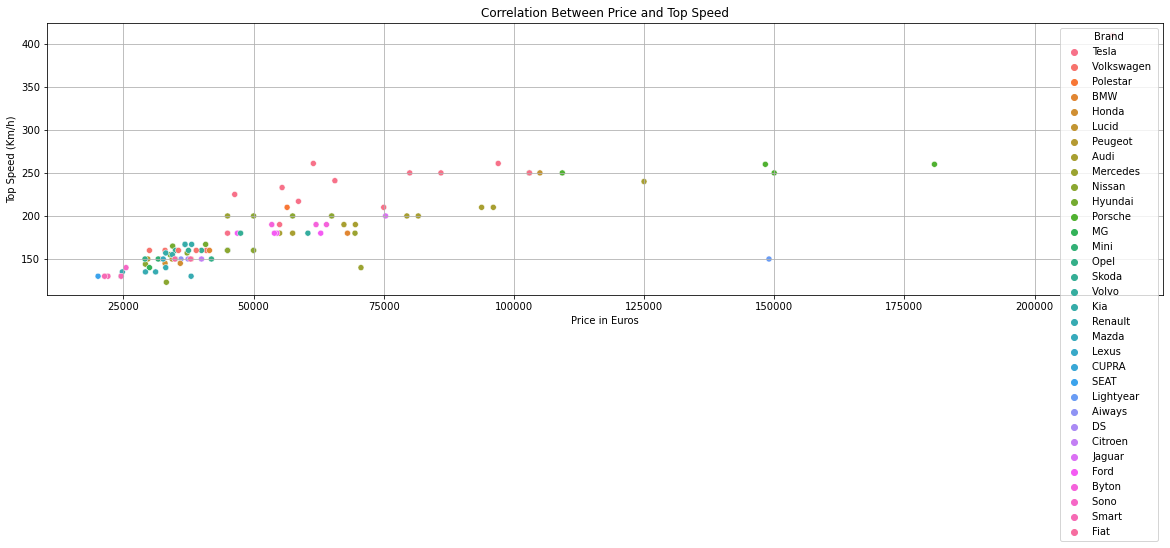

In [28]:
plt.figure(figsize=(20, 5))
sn.scatterplot(data=df, x='PriceEuro', y='TopSpeed_KmH', hue='Brand')
plt.title('Correlation Between Price and Top Speed')
plt.xlabel('Price in Euros')
plt.ylabel('Top Speed (Km/h)')
plt.grid(True)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For visualizing regression results
import statsmodels.api as sm

In [30]:
# Features and target variable
X = df[['TopSpeed_KmH', 'Range_Km', 'AccelSec']]  # Predictor variables
y = df['PriceEuro']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

In [32]:
# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display the coefficients of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 347652673.1574147
R^2 Score: 0.5616189539487747
Coefficients: [ 558.64231101   73.18117364 1389.79332224]
Intercept: -78840.55250719961


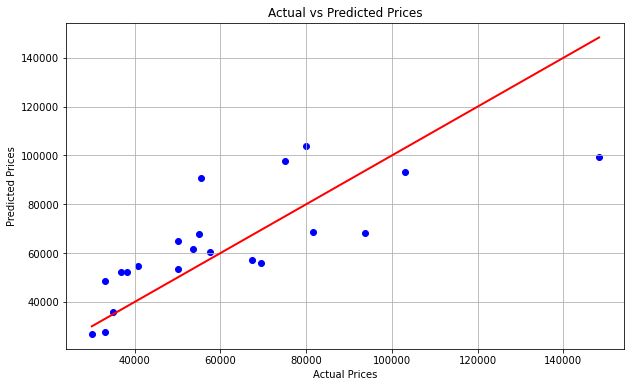

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [34]:
# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fitting the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Displaying the summary
print(model_sm.summary())

D:\New folder\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:              PriceEuro   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     63.65
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           6.53e-21
Time:                        18:37:50   Log-Likelihood:                -923.97
No. Observations:                  82   AIC:                             1856.
Df Residuals:                      78   BIC:                             1866.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.884e+04   2.04e+04     -3.870   

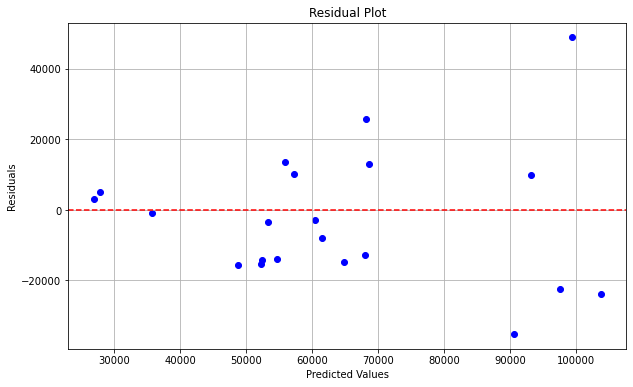

In [35]:

# Calculating residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


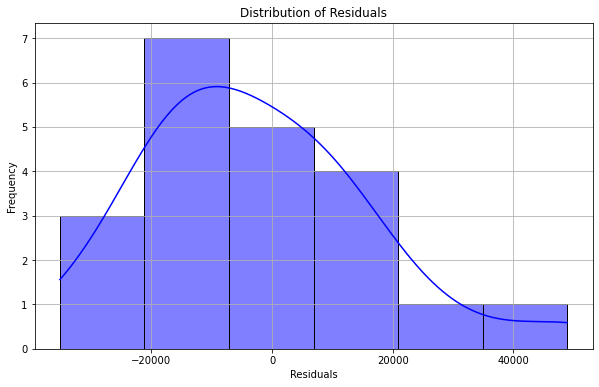

In [36]:
plt.figure(figsize=(10, 6))
sn.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

D:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



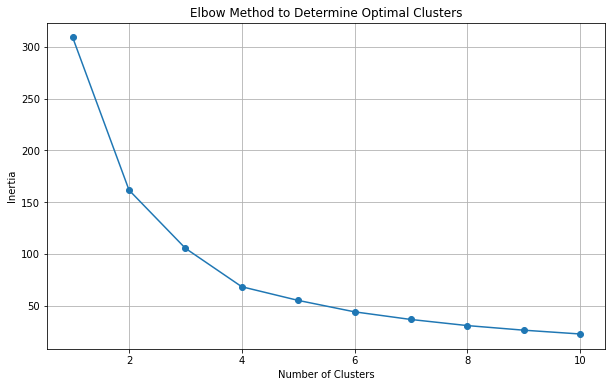

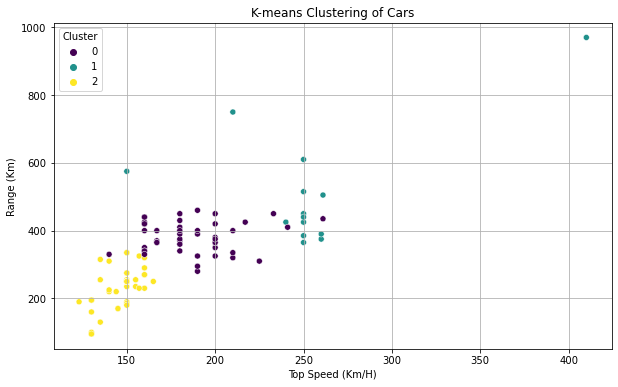

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Select features for clustering
Xm = df[['TopSpeed_KmH', 'Range_Km', 'PriceEuro']]  # Example features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xm)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)  # Assume 3 is optimal
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sn.scatterplot(x='TopSpeed_KmH', y='Range_Km', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering of Cars')
plt.xlabel('Top Speed (Km/H)')
plt.ylabel('Range (Km)')
plt.grid(True)
plt.show()


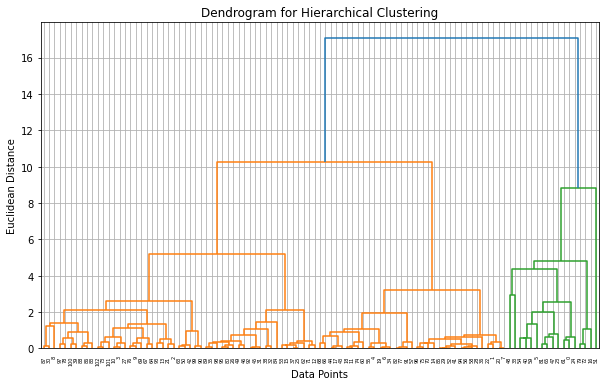

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

In [39]:
# Select numeric features
features = ['TopSpeed_KmH', 'PriceEuro', 'Range_Km', 'AccelSec']  # Example feature columns
Xn = df[features]

In [40]:
# Standardize the data
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(Xn)

In [41]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled2)

In [42]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Brand'] = df['Brand']  # Adding a categorical feature for visualization

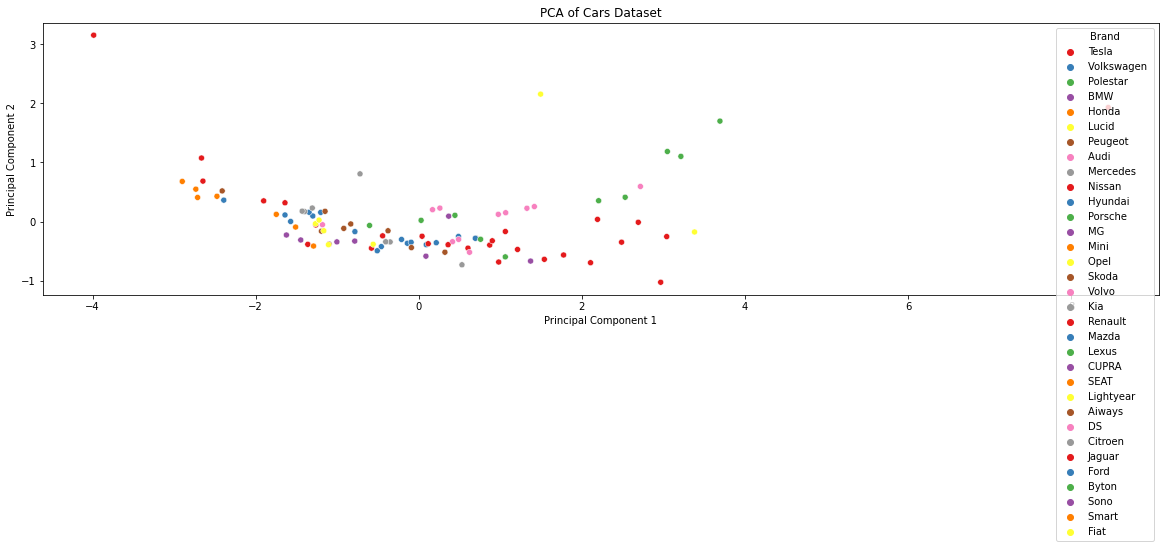

In [43]:
# Plot the PCA results
plt.figure(figsize=(20, 5))
sn.scatterplot(x='PC1', y='PC2', hue='Brand', data=pca_df, palette='Set1')
plt.title('PCA of Cars Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Explained variance by PC1: 0.79
Explained variance by PC2: 0.09


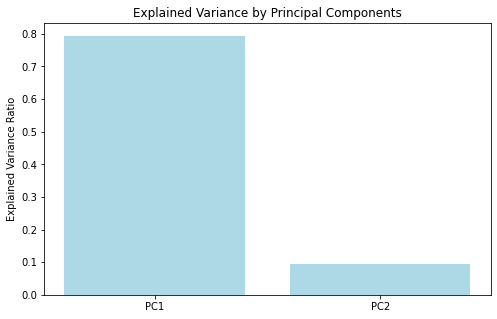

In [44]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1: {explained_variance[0]:.2f}')
print(f'Explained variance by PC2: {explained_variance[1]:.2f}')

# Plotting the explained variance
plt.figure(figsize=(8, 5))
plt.bar(['PC1', 'PC2'], explained_variance, color='lightblue')
plt.title('Explained Variance by Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()